# Part II - Ford GoBike System Data
## by Sharath V

## Investigation Overview

The goal of this presentation is to provide insights on the Ford Gobike dataset. Key insights that will be covered in this presentation include the following: 
1. Weekdays appear to be more popular for bike rides compared to weekends. 
2. Peak Hours for bike ride are 7am - 9am and  4pm-6pm. 
3. Around 75% of the bike ride users are males.
4. 25-35 Age group contribute to the most no. of bike rides when considering ride duration below 60 min. 


## Dataset Overview

* Ford GoBike System Data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
* The original dataset had 183412 rows and 16 columns. 
* Some of the columns had duplicate data and null values. 
* Data types of some columns had to be changed to appropriate ones. 
* A few time-related columns were deduced (newly created) from the 'start_time' and 'end_time' which are useful for the analysis. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata_clean.csv')

## Distribution of bike rides between weekdays and weekends.

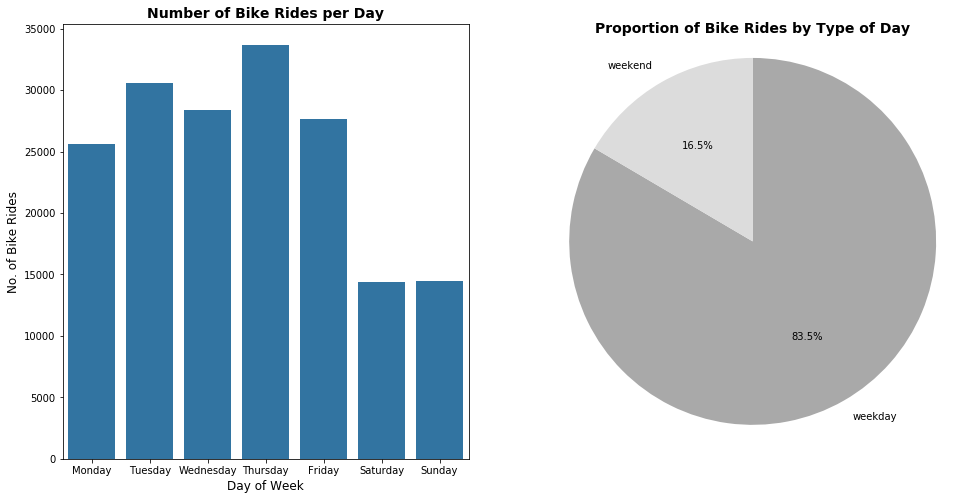

In [4]:
# Create 2 subplots, one for no. of trips per day and another one to show the composition of type of day
plt.figure(figsize =(16, 8))

days = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

# Subplot 1 Bar Chart
plt.subplot(1,2,1)
base_color = sb.color_palette()[0] 
sb.countplot(data = df, x = 'day_of_week', color = base_color, order = days)
plt.title('Number of Bike Rides per Day', fontsize=14, fontweight='bold');
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('No. of Bike Rides', fontsize=12)


# Subplot 2 Pie Chart
plt.subplot(1,2,2)
type_of_day_counts = df['type_of_day'].value_counts()
colors = ['darkgrey','gainsboro']
plt_1 = plt.pie(type_of_day_counts, labels = type_of_day_counts.index, colors = colors, startangle=90, counterclock = False, autopct ='%.1f%%');
plt.axis('square');
plt.title ('Proportion of Bike Rides by Type of Day', fontsize=14, fontweight='bold'); 

#### Comments on Visualization

* From the above bar chart, it is clear that the number of bike rides in weekdays (Monday to Friday) is far higher than the number of bike rides in the weekends (Saturday & Sunday). Additionally, we can specifically see the popular days of the week for bike share rides.

* The pie chart gives a better picture on the percentage composition of the bike rides between weekdays and weekends. This insight can be crucial to better understand on which days the probability of demand for bike share ride can be higher and also to plan regular maintainance activities with minimal impact on operations. 

## Most popular hours of the day for bike ride


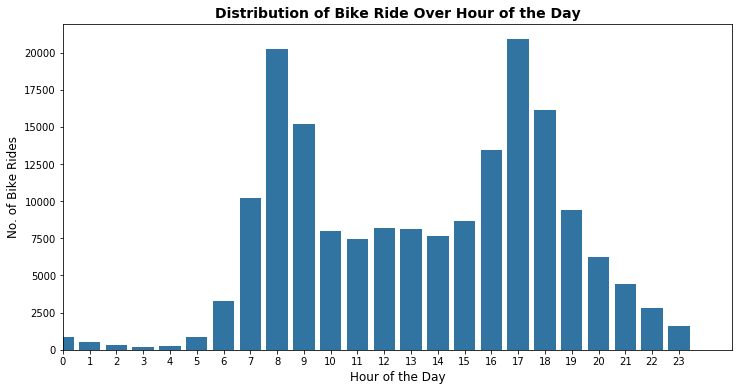

In [5]:
# Distribution of rides over hours
plt.figure(figsize=(12,6))
hour_bins = np.arange(0, df['hour'].max()+1, 1)

sb.countplot(data=df, x='hour', color = base_color)
plt.title('Distribution of Bike Ride Over Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('No. of Bike Rides', fontsize=12)
plt.xlim((0,25));

#### Comments on Visualization

* From the bar chart above, 7am-9am and 4pm-6pm (16H-18H) have the max. number of bike rides. Hence these are the peak hours. This information is crucial to understand at what time of the day there is a maximum demand for bikes and thereby to ensure availability of bikes more at the peak hours. 

* Also,in continuation from the previous insight on the popular day of the week, maintainance activities can be planned outside these peak hours to have the least impact on bike users. 

## Bike Users by Gender


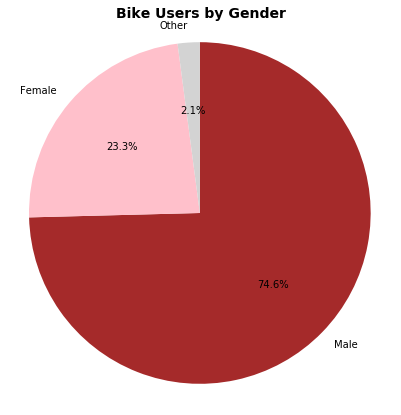

In [6]:
# Create a pie chart of member gender composition
gender_counts = df['member_gender'].value_counts()
colors = ['brown','pink','lightgrey']
plt_1 = plt.figure(figsize=(7,7));
plt_1 = plt.pie(gender_counts, labels = gender_counts.index, colors = colors, startangle=90, counterclock = False, autopct ='%.1f%%');
plt.axis('square');
plt.title ('Bike Users by Gender', fontsize=14, fontweight='bold'); 

#### Comments on Visualization

It is interesting to see that 75% of the bike ride users are Males. On the one hand, this insight gives an idea of which gender uses the bike sharing service the most. On the other hand, it might be relevant to understand why the service is not popular among other genders and what steps can be taken to gain more users from other genders. 

## User Age vs. Duration of Ride (<60 min)

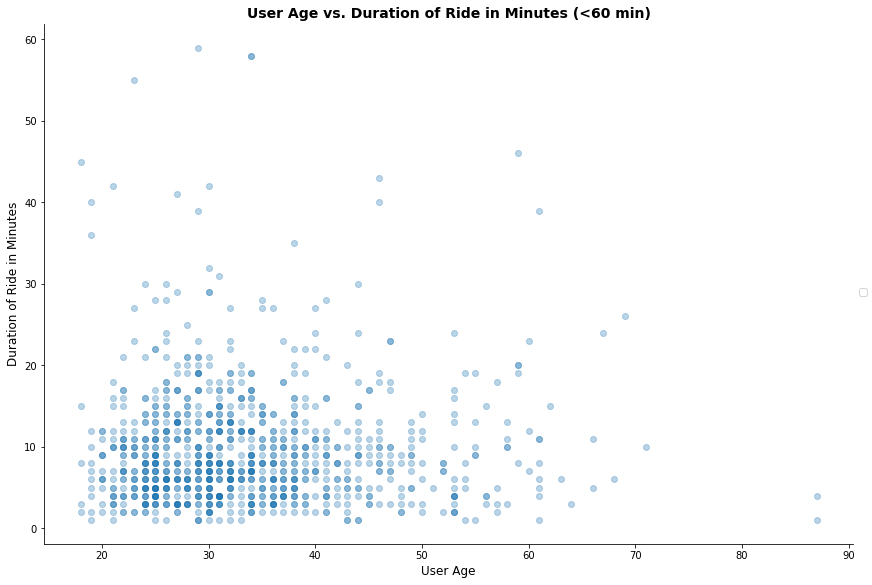

In [14]:
# Comparing User Age vs. Duration of Ride in minutes in a random sample of 200 rides

# Create a subset of data having duration in min < 60 minutes

duration_60 = df.query("duration_min <=60")

# Random samples of 200 records in this subset
np.random.seed(2018)
sample = np.random.choice(duration_60.shape[0], 1000, replace = False)
df_subset = duration_60.reindex(sample)

# Create a scatter plot of User Age vs. Duration of Ride in Minutes
g = sb.FacetGrid(data =df_subset,  size =8, aspect=1.5)
g.map(plt.scatter, 'age', 'duration_min', alpha=0.3)
g.add_legend()
plt.title('User Age vs. Duration of Ride in Minutes (<60 min)', fontsize=14, fontweight='bold');
plt.xlabel('User Age', fontsize=12)
plt.ylabel('Duration of Ride in Minutes', fontsize=12);

#### Comments on Visualization

In the subset of rides below 60 minutes, the age group 25-35 seem to have the most number of rides. This insight can be useful to understand the target customer group for marketing purposes. 

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [15]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 399865 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/